# Titanic

In [177]:
import numpy as np # linear algebra
import pandas as pd # CSV file I/O
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

## Ⅰ 数据采集及存储

In [178]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [179]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Ⅱ 数据预处理
* 数据清洗
数据集成
数据变换
数据规约
* 数据缺失
重复
不同计量单位
噪声

### step1 数据清理——处理缺失数据

In [180]:
train_data.isna().sum()
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [181]:
# 为fare填充缺失值
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [182]:
# 查看embarked的取值分布
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [183]:
# 缺失embarked的数据较少（只有两条），用众数填充
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

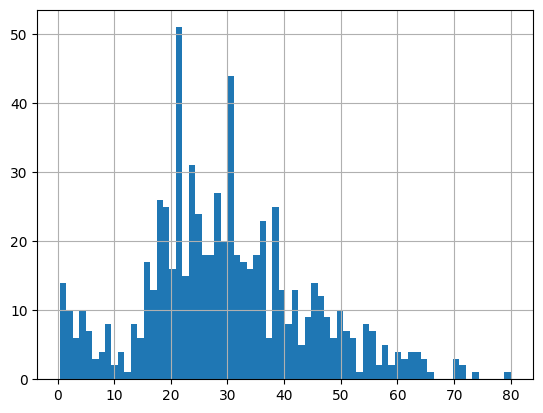

In [184]:
# 查看年龄分布
train_data['Age'].hist(bins=70)
# 选择用中位数填充年龄
# TODO:年龄缺失较多，用KNN/EM/热卡填充预测年龄
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [185]:
# cabin数据缺失太多，先暂时不填充，待特征工程时再决定如何处理

### 数据清理——噪声处理
* 经检验，数据非常整齐，没有明显噪声

In [186]:
# 观察各特征值有无异常值
a = train_data['PassengerId'].nunique() == train_data.shape[0]
print(f'passengerId各不相同：{a}\n')
b = train_data['Survived'].value_counts()
print(f'Survived 可能的取值：\n{b}\n')
c = train_data['Pclass'].value_counts()
print(f'Pclass 可能的取值：\n{c}\n')
d = train_data["Name"].nunique() == train_data.shape[0]
print(f'Name各不相同：{d}\n')
e = train_data["Sex"].value_counts()
print(f'Sex 可能的取值：\n{e}\n')
f = train_data["Age"].min()
g = train_data["Age"].max()
print(f'Age 可能的取值范围：{f}~{g}\n')
h = train_data["SibSp"].value_counts()
print(f'SibSp 可能的取值：\n{h}\n')
i = train_data["Parch"].value_counts()
print(f'Parch 可能的取值：\n{i}\n')
j = train_data["Ticket"].value_counts()
print(f'Ticket 可能的取值：\n{j}\n')
k = train_data["Fare"].min()
l = train_data["Fare"].max()
print(f'Fare 可能的取值范围：{k}~{l}\n')
m = train_data["Cabin"].value_counts()
print(f'Cabin 可能的取值：\n{m}\n')
n = train_data["Embarked"].value_counts()
print(f'Embarked 可能的取值：\n{n}\n')

# 未发现数据中含有异常值：
# 年龄票价等连续值均大于0且取值符合常理
# 离散值类型一致，不存在数字和字符串混合的情况；id等唯一值各不相同


passengerId各不相同：True

Survived 可能的取值：
Survived
0    549
1    342
Name: count, dtype: int64

Pclass 可能的取值：
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Name各不相同：True

Sex 可能的取值：
Sex
male      577
female    314
Name: count, dtype: int64

Age 可能的取值范围：0.42~80.0

SibSp 可能的取值：
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch 可能的取值：
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Ticket 可能的取值：
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Fare 可能的取值范围：0.0~512.3292

Cabin 可能的取值：
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Embarked 可能的取值：
Emb

### step2 数据集成
* 只有一个数据源，无需集成

### step3 数据变换
* 规范化、离散化

In [187]:
# 决策树、随机森林对数据的原始尺度不敏感，可能不需要归一化、离散化
# SVM、KNN、xgboost等模型对数据的尺度敏感，需要归一化、离散化
"""
train_norm = train_data.copy()
test_norm = test_data.copy()
print(train_norm["Age"])
"""


'\ntrain_norm = train_data.copy()\ntest_norm = test_data.copy()\nprint(train_norm["Age"])\n'

### step4 数据规约

## Ⅲ 特征工程

### step1 观察、构建特征

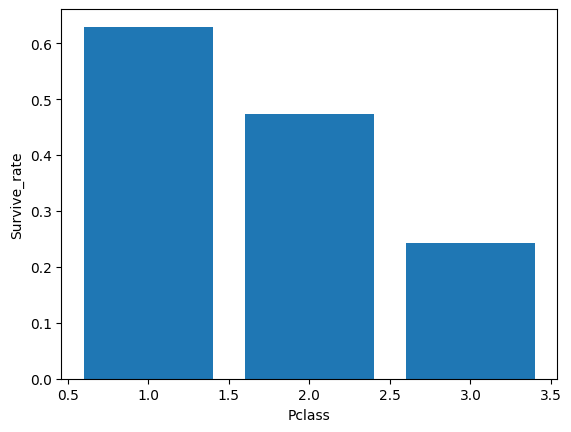

In [188]:
pclass_1 = train_data[train_data.Pclass == 1]
pclass_2 = train_data[train_data.Pclass == 2]
pclass_3 = train_data[train_data.Pclass == 3]
sum_1 = pclass_1.shape[0]
sum_2 = pclass_2.shape[0]
sum_3 = pclass_3.shape[0]
survived_1 = pclass_1[pclass_1.Survived == 1].shape[0]
survived_2 = pclass_2[pclass_2.Survived == 1].shape[0]
survived_3 = pclass_3[pclass_3.Survived == 1].shape[0]
survived_rate_1 = survived_1 / sum_1
survived_rate_2 = survived_2 / sum_2
survived_rate_3 = survived_3 / sum_3
plt.bar([1,2,3],[survived_rate_1,survived_rate_2,survived_rate_3])
plt.xlabel('Pclass')
plt.ylabel('Survive_rate')
plt.show()
# 观察的结果是：Pclass越高，存活率越高

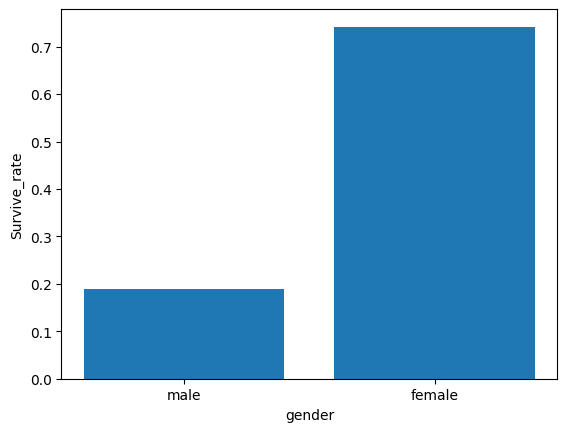

In [189]:
male = train_data[train_data.Sex == 'male']
female = train_data[train_data.Sex == 'female']
sum1 = male.shape[0]
sum2 = female.shape[0]
survived_m = male[male.Survived == 1].shape[0]
survived_f = female[female.Survived == 1].shape[0]
survived_rate_m = survived_m / sum1
survived_rate_f = survived_f / sum2
plt.bar(['male','female'],[survived_rate_m,survived_rate_f])
plt.xlabel('gender')
plt.ylabel('Survive_rate')
plt.show()
# 观察的结果是：女性存活率更高


# 转化sex为0-1
train_data['Sex_num'] = train_data['Sex'].replace({'male':1,'female':0})
train_data.head(5)
test_data['Sex_num'] = test_data['Sex'].replace({'male':1,'female':0})

C:\Users\masr1\AppData\Local\Temp\ipykernel_1800\3603660146.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survive = train_data[train_data["Survived"] == 1].groupby('age_cul').size().values


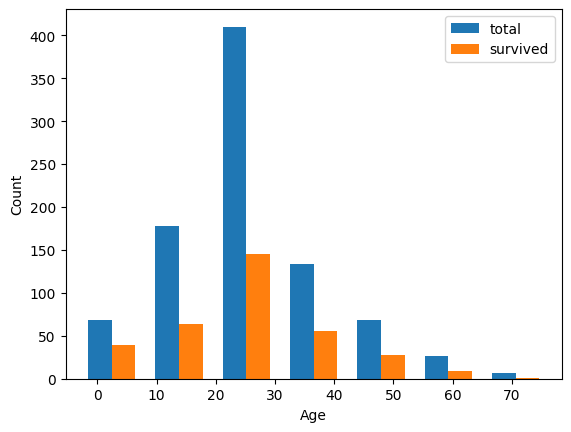

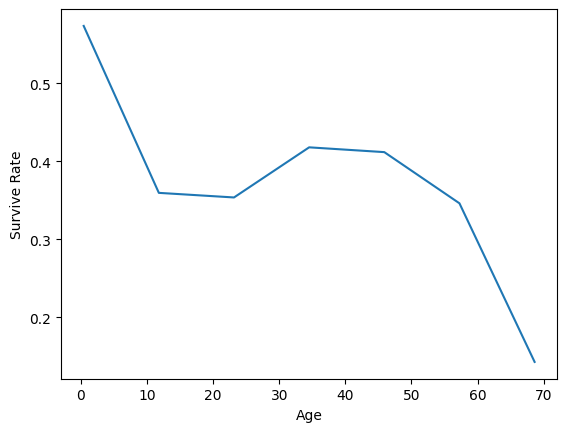

"survived_list = train_data.Survived.tolist()\nage_list = train_data.Age.tolist()\nplt.scatter(age_list, survived_list)\nplt.xlabel('Age')\nplt.ylabel('Survive_ornot')\nplt.show()\n# 观察的结果是：年龄越小，存活人数越多"

In [190]:
age = train_data["Age"].values
bin_width = 10
num_bins = int((age.max() - age.min()) / bin_width)
train_data['age_cul'] = pd.cut(age, num_bins)
survive = train_data[train_data["Survived"] == 1].groupby('age_cul').size().values
hist, bins = np.histogram(age, bins=num_bins)
survive_rate = survive / hist
survive_rate = np.nan_to_num(survive_rate)

width = 0.35 * (bins[1] - bins[0])
plt.bar(bins[:-1], hist, width=width, label='total')
plt.bar(bins[:-1] + width, survive, width=width, label='survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.plot(bins[:-1], survive_rate)
plt.xlabel('Age')
plt.ylabel('Survive Rate')
plt.show()

'''survived_list = train_data.Survived.tolist()
age_list = train_data.Age.tolist()
plt.scatter(age_list, survived_list)
plt.xlabel('Age')
plt.ylabel('Survive_ornot')
plt.show()
# 观察的结果是：年龄越小，存活人数越多'''

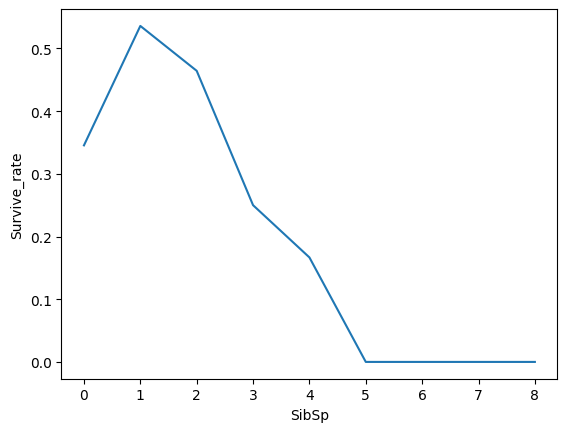

In [191]:
sib1 = train_data[train_data.SibSp == 0]
sib2 = train_data[train_data.SibSp == 1]
sib3 = train_data[train_data.SibSp == 2]
sib4 = train_data[train_data.SibSp == 3]
sib5 = train_data[train_data.SibSp == 4]
sib6 = train_data[train_data.SibSp == 5]
sib7 = train_data[train_data.SibSp == 8]
survived_rate_1 = sib1[sib1.Survived == 1].shape[0] / sib1.shape[0]
survived_rate_2 = sib2[sib2.Survived == 1].shape[0] / sib2.shape[0]
survived_rate_3 = sib3[sib3.Survived == 1].shape[0] / sib3.shape[0]
survived_rate_4 = sib4[sib4.Survived == 1].shape[0] / sib4.shape[0]
survived_rate_5 = sib5[sib5.Survived == 1].shape[0] / sib5.shape[0]
survived_rate_6 = sib6[sib6.Survived == 1].shape[0] / sib6.shape[0]
survived_rate_7 = sib7[sib7.Survived == 1].shape[0] / sib7.shape[0]
plt.plot([0,1,2,3,4,5,8],[survived_rate_1,survived_rate_2,survived_rate_3,survived_rate_4,survived_rate_5,survived_rate_6,survived_rate_7])
plt.xlabel('SibSp')
plt.ylabel('Survive_rate')
plt.show()

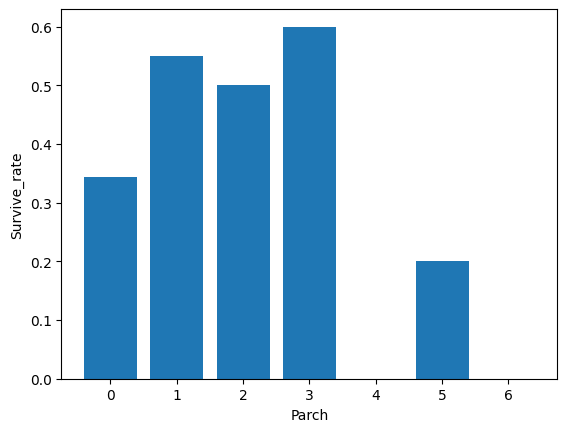

In [192]:
survive_parch1 = train_data[train_data.Parch == 0][train_data[train_data.Parch == 0].Survived == 1].shape[0] / train_data[train_data.Parch == 0].shape[0]
survive_parch2 = train_data[train_data.Parch == 1][train_data[train_data.Parch == 1].Survived == 1].shape[0] / train_data[train_data.Parch == 1].shape[0]
survive_parch3 = train_data[train_data.Parch == 2][train_data[train_data.Parch == 2].Survived == 1].shape[0] / train_data[train_data.Parch == 2].shape[0]
survive_parch4 = train_data[train_data.Parch == 3][train_data[train_data.Parch == 3].Survived == 1].shape[0] / train_data[train_data.Parch == 3].shape[0]
survive_parch5 = train_data[train_data.Parch == 4][train_data[train_data.Parch == 4].Survived == 1].shape[0] / train_data[train_data.Parch == 4].shape[0]
survive_parch6 = train_data[train_data.Parch == 5][train_data[train_data.Parch == 5].Survived == 1].shape[0] / train_data[train_data.Parch == 5].shape[0]
survive_parch7 = train_data[train_data.Parch == 6][train_data[train_data.Parch == 6].Survived == 1].shape[0] / train_data[train_data.Parch == 6].shape[0]
plt.bar([0,1,2,3,4,5,6],[survive_parch1,survive_parch2,survive_parch3,survive_parch4,survive_parch5,survive_parch6,survive_parch7])
plt.xlabel('Parch')
plt.ylabel('Survive_rate')
plt.show()

C:\Users\masr1\AppData\Local\Temp\ipykernel_1800\2224884382.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survive = train_data[train_data["Survived"] == 1].groupby('price_cul').size()
C:\Users\masr1\AppData\Local\Temp\ipykernel_1800\2224884382.py:8: RuntimeWarning: invalid value encountered in divide
  survive_rate = survive / hist


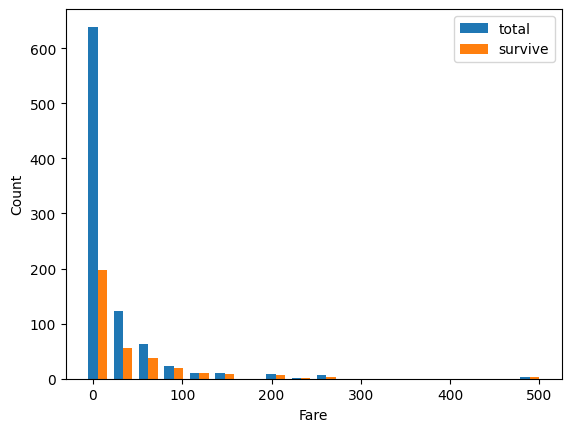

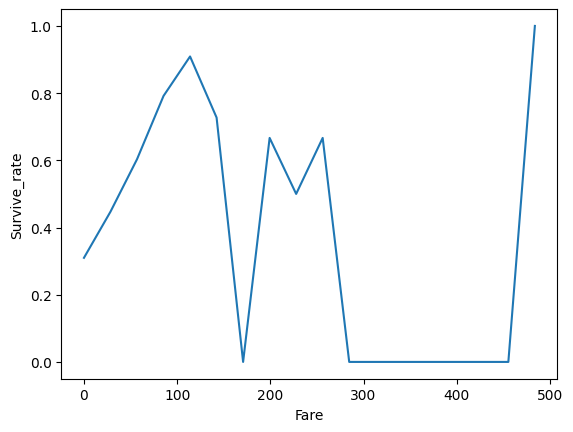

In [193]:
fare = train_data["Fare"].values
bin_width = 30
num_bins = int((fare.max() - fare.min()) / bin_width) + 1
train_data['price_cul'] = pd.cut(fare, bins=num_bins)
survive = train_data[train_data["Survived"] == 1].groupby('price_cul').size()
survive = survive.values
hist, bins = np.histogram(fare, bins=num_bins)
survive_rate = survive / hist
survive_rate = np.nan_to_num(survive_rate)

width = 0.35*bin_width
plt.bar(bins[:-1], hist, width=width, label='total')
plt.bar(bins[:-1] + width, survive, width=width, label='survive')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()


plt.plot(bins[:-1], survive_rate)
plt.xlabel('Fare')
plt.ylabel('Survive_rate')
plt.show()

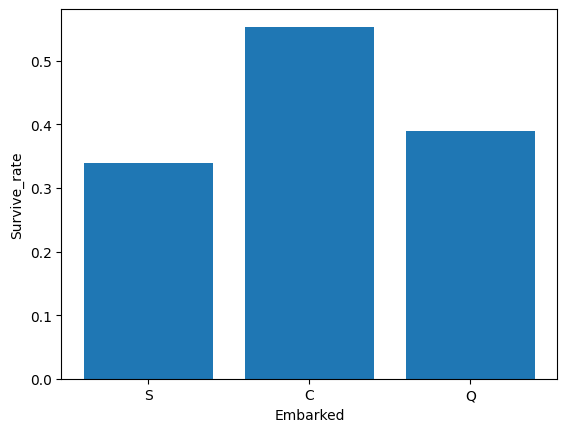

In [194]:
embrak1 = train_data[train_data.Embarked == 'S']
embrak2 = train_data[train_data.Embarked == 'C']
embrak3 = train_data[train_data.Embarked == 'Q']
survive_rate_1 = embrak1[embrak1.Survived == 1].shape[0] / embrak1.shape[0]
survive_rate_2 = embrak2[embrak2.Survived == 1].shape[0] / embrak2.shape[0]
survive_rate_3 = embrak3[embrak3.Survived == 1].shape[0] / embrak3.shape[0]
plt.bar(['S','C','Q'],[survive_rate_1,survive_rate_2,survive_rate_3])
plt.xlabel('Embarked')
plt.ylabel('Survive_rate')
plt.show()


In [195]:
# 查看cabin类型
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [196]:
# 发现cabin完全相同的数据很少，因此简化cabin为其首字母
train_data['Cabin'] = train_data['Cabin'].str[0]
train_data['Cabin'].value_counts()
test_data['Cabin'] = test_data['Cabin'].str[0]

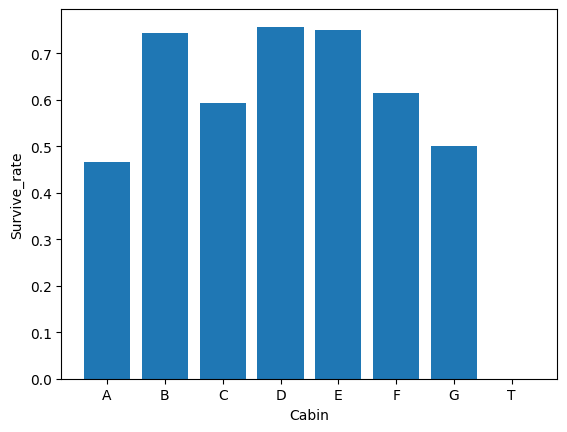

In [197]:
# 查看cabin与survived的关系大不大
A = train_data[train_data.Cabin == 'A']
B = train_data[train_data.Cabin == 'B']
C = train_data[train_data.Cabin == 'C']
D = train_data[train_data.Cabin == 'D']
E = train_data[train_data.Cabin == 'E']
F = train_data[train_data.Cabin == 'F']
G = train_data[train_data.Cabin == 'G']
T = train_data[train_data.Cabin == 'T']
survived_rate_A = A[A.Survived == 1].shape[0] / A.shape[0]
survived_rate_B = B[B.Survived == 1].shape[0] / B.shape[0]
survived_rate_C = C[C.Survived == 1].shape[0] / C.shape[0]
survived_rate_D = D[D.Survived == 1].shape[0] / D.shape[0]
survived_rate_E = E[E.Survived == 1].shape[0] / E.shape[0]
survived_rate_F = F[F.Survived == 1].shape[0] / F.shape[0]
survived_rate_G = G[G.Survived == 1].shape[0] / G.shape[0]
survived_rate_T = T[T.Survived == 1].shape[0] / T.shape[0]
#print(survived_rate_A,survived_rate_B,survived_rate_C,survived_rate_D,survived_rate_E,survived_rate_F,survived_rate_G,survived_rate_T)
plt.bar(['A','B','C','D','E','F','G','T'],[survived_rate_A,survived_rate_B,survived_rate_C,survived_rate_D,survived_rate_E,survived_rate_F,survived_rate_G,survived_rate_T])
plt.xlabel('Cabin')
plt.ylabel('Survive_rate')
plt.show()


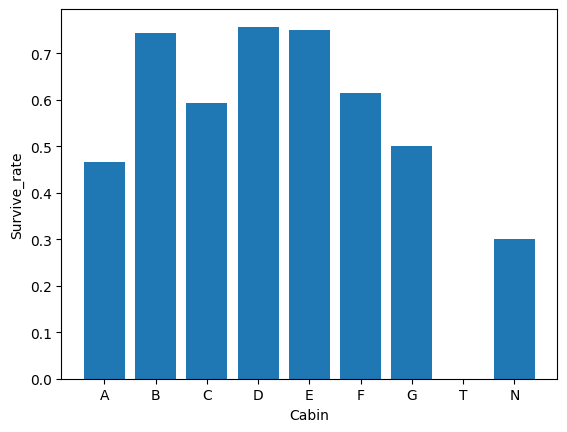

In [198]:
# 发现有cabin标记的数据存活率比总平均存活率高，因此将没有cabin标记的数据标记为‘N’
train_data['Cabin'].fillna('N', inplace=True)

N = train_data[train_data.Cabin == 'N']
survived_rate_N = N[N.Survived == 1].shape[0] / N.shape[0]
plt.bar(['A','B','C','D','E','F','G','T','N'],[survived_rate_A,survived_rate_B,survived_rate_C,survived_rate_D,survived_rate_E,survived_rate_F,survived_rate_G,survived_rate_T,survived_rate_N])
plt.xlabel('Cabin')
plt.ylabel('Survive_rate')
plt.show()
# 观察到N与其他cabin类别的差距和cabin类别间的差距没有很大，因此当前的划分方式比将cabin分为有无两类更合理

# 转化值为数字
train_data['Cabin_num'] = train_data['Cabin'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'T':7,'G':8,'N':0})
#train_data['Cabin']
train_data['Cabin_num']

test_data['Cabin'].fillna('N', inplace=True)
test_data['Cabin_num'] = test_data['Cabin'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'T':7,'G':8,'N':0})


#### 独热编码
* 将离散且标签间没有明显顺序关系的特征转化为独热编码
  * 此处仅有embark符合这个条件

In [199]:
# embark拆分成三列
train_data = pd.get_dummies(train_data, columns=['Embarked'])
test_data = pd.get_dummies(test_data, columns=['Embarked'])
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,age_cul,price_cul,Cabin_num,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,1,"(11.789, 23.157]","(-0.512, 28.463]",0,False,False,True


#### 构建更有意义的特征
* sibsp表示兄弟姐妹和配偶人数，parch表示父母和子女人数，两个特征求和再加自己表示家庭成员人数
    * 1表示独自一人，2-3表示小家庭，4-7表示中等家庭，8以上表示大家庭
  
    用不同方式表示构建家庭成员人数的特征，观察哪种方式更合理

In [200]:
# 创建新特征：家庭成员数
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
train_data['FamilySize'].value_counts()


FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

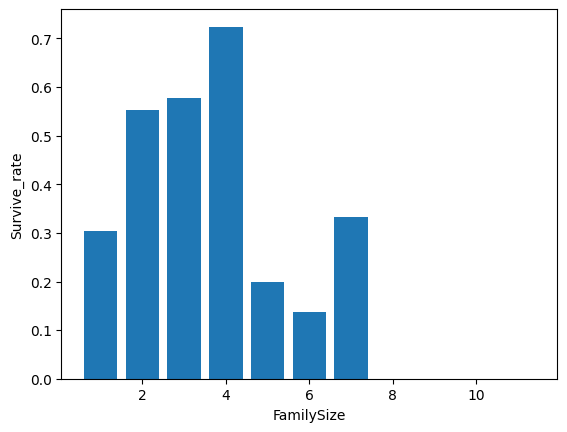

In [201]:
survived_rate_1 = train_data[train_data.FamilySize == 1][train_data[train_data.FamilySize == 1].Survived == 1].shape[0] / train_data[train_data.FamilySize == 1].shape[0]
survived_rate_2 = train_data[train_data.FamilySize == 2][train_data[train_data.FamilySize == 2].Survived == 1].shape[0] / train_data[train_data.FamilySize == 2].shape[0]
survived_rate_3 = train_data[train_data.FamilySize == 3][train_data[train_data.FamilySize == 3].Survived == 1].shape[0] / train_data[train_data.FamilySize == 3].shape[0]
survived_rate_4 = train_data[train_data.FamilySize == 4][train_data[train_data.FamilySize == 4].Survived == 1].shape[0] / train_data[train_data.FamilySize == 4].shape[0]
survived_rate_5 = train_data[train_data.FamilySize == 5][train_data[train_data.FamilySize == 5].Survived == 1].shape[0] / train_data[train_data.FamilySize == 5].shape[0]
survived_rate_6 = train_data[train_data.FamilySize == 6][train_data[train_data.FamilySize == 6].Survived == 1].shape[0] / train_data[train_data.FamilySize == 6].shape[0]
survived_rate_7 = train_data[train_data.FamilySize == 7][train_data[train_data.FamilySize == 7].Survived == 1].shape[0] / train_data[train_data.FamilySize == 7].shape[0]
survived_rate_8 = train_data[train_data.FamilySize == 8][train_data[train_data.FamilySize == 8].Survived == 1].shape[0] / train_data[train_data.FamilySize == 8].shape[0]
survived_rate_11 = train_data[train_data.FamilySize == 11][train_data[train_data.FamilySize == 11].Survived == 1].shape[0] / train_data[train_data.FamilySize == 11].shape[0]
plt.bar([1,2,3,4,5,6,7,8,11],[survived_rate_1,survived_rate_2,survived_rate_3,survived_rate_4,survived_rate_5,survived_rate_6,survived_rate_7,survived_rate_8,survived_rate_11])
plt.xlabel('FamilySize')
plt.ylabel('Survive_rate')
plt.show()


In [202]:
# 观察到家庭成员数为2~4时存活率较高，因此将家庭成员数分为4类：独自，小家庭，中等家庭，大家庭
train_data['FamilySizeDiscrete'] = np.where((train_data['FamilySize'] == 1), 'Alone', '')
train_data['FamilySizeDiscrete'] = np.where((train_data['FamilySize'] >= 2) & (train_data['FamilySize'] <= 4), 'Small', train_data['FamilySizeDiscrete'])
train_data['FamilySizeDiscrete'] = np.where((train_data['FamilySize'] >= 5) & (train_data['FamilySize'] <= 7), 'Medium', train_data['FamilySizeDiscrete'])
train_data['FamilySizeDiscrete'] = np.where((train_data['FamilySize'] >= 8), 'Large', train_data['FamilySizeDiscrete'])
test_data['FamilySizeDiscrete'] = np.where((test_data['FamilySize'] == 1), 'Alone', '')
test_data['FamilySizeDiscrete'] = np.where((test_data['FamilySize'] >= 2) & (test_data['FamilySize'] <= 4), 'Small', test_data['FamilySizeDiscrete'])
test_data['FamilySizeDiscrete'] = np.where((test_data['FamilySize'] >= 5) & (test_data['FamilySize'] <= 7), 'Medium', test_data['FamilySizeDiscrete'])
test_data['FamilySizeDiscrete'] = np.where((test_data['FamilySize'] >= 8), 'Large', test_data['FamilySizeDiscrete'])

train_data['FamilySizeDiscrete'].value_counts()

FamilySizeDiscrete
Alone     537
Small     292
Medium     49
Large      13
Name: count, dtype: int64

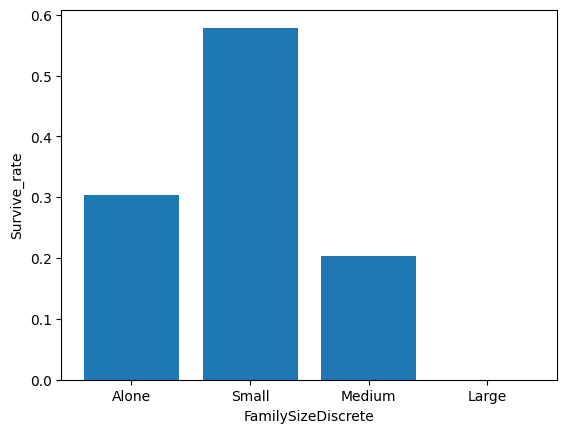

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: FamilySizeD_num, Length: 891, dtype: int64

In [203]:
survive_a = train_data[train_data.FamilySizeDiscrete == 'Alone'][train_data[train_data.FamilySizeDiscrete == 'Alone'].Survived == 1].shape[0] / train_data[train_data.FamilySizeDiscrete == 'Alone'].shape[0]
survive_s = train_data[train_data.FamilySizeDiscrete == 'Small'][train_data[train_data.FamilySizeDiscrete == 'Small'].Survived == 1].shape[0] / train_data[train_data.FamilySizeDiscrete == 'Small'].shape[0]
survive_m = train_data[train_data.FamilySizeDiscrete == 'Medium'][train_data[train_data.FamilySizeDiscrete == 'Medium'].Survived == 1].shape[0] / train_data[train_data.FamilySizeDiscrete == 'Medium'].shape[0]
survive_l = train_data[train_data.FamilySizeDiscrete == 'Large'][train_data[train_data.FamilySizeDiscrete == 'Large'].Survived == 1].shape[0] / train_data[train_data.FamilySizeDiscrete == 'Large'].shape[0]
plt.bar(['Alone','Small','Medium','Large'],[survive_a,survive_s,survive_m,survive_l])
plt.xlabel('FamilySizeDiscrete')
plt.ylabel('Survive_rate')
plt.show()
train_data.head(1)

# 转化为数字
train_data['FamilySizeD_num'] = train_data['FamilySizeDiscrete'].replace({'Alone':1,'Small':2,'Medium':3,'Large':4})
test_data['FamilySizeD_num'] = test_data['FamilySizeDiscrete'].replace({'Alone':1,'Small':2,'Medium':3,'Large':4})
train_data['FamilySizeD_num']
#train_data['FamilySizeDiscrete']

#### 处理文字特征name
* 由于单纯名字对判断生存率意义不大，因此选择对称谓分类

In [204]:
# 首先对名字分词
for index, row in train_data.iterrows():
    name = row['Name'].split(',')[1].split('.')[0].strip()
    train_data.loc[index, 'Title'] = name
for index, row in test_data.iterrows():
    name = row['Name'].split(',')[1].split('.')[0].strip()
    test_data.loc[index, 'Title'] = name
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [205]:
# 经查询知:
# Mr:已婚男士
# Mrs:已婚女士
# Miss:未婚女士
# Master:小男孩
# Dr:医生
# Rev:牧师
# Col:陆军上校
# Major:陆军少校
# Mlle:法语“小姐”（Miss的法语缩写）
# Ms:女士
# Mme:法语“夫人”（Mrs的法语缩写）
# Sir:爵士
# Lady:女士
# Countess:女伯爵
# Don:西班牙语中的贵族称呼，相当于英语中的Sir
# Jonkheer:荷兰语中的贵族称呼，相当于英语中的Sir
# Capt:船长

# 由此将称谓分为6类
# Mr,
# Mrs,Ms,Mme,Lady ==> Mrs
# Miss,Mlle ==> Miss
# Master,
# Dr,Rev,Col,Major,Capt ==> Officer
# Sir,Countess,Don,Jonkheer ==> Royalty

train_data['Title'] = train_data['Title'].replace(['Ms', 'Mme', 'Lady'], 'Mrs')
train_data['Title'] = train_data['Title'].replace(['Mlle'], 'Miss')
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt'], 'Officer')
train_data['Title'] = train_data['Title'].replace(['Sir', 'the Countess', 'Don', 'Jonkheer'], 'Royalty')
test_data['Title'] = test_data['Title'].replace(['Ms', 'Mme', 'Lady'], 'Mrs')
test_data['Title'] = test_data['Title'].replace(['Mlle'], 'Miss')
test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt'], 'Officer')
test_data['Title'] = test_data['Title'].replace(['Sir', 'the Countess', 'Don', 'Jonkheer'], 'Royalty')

test_data['Title'].value_counts()



Title
Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Dona         1
Name: count, dtype: int64

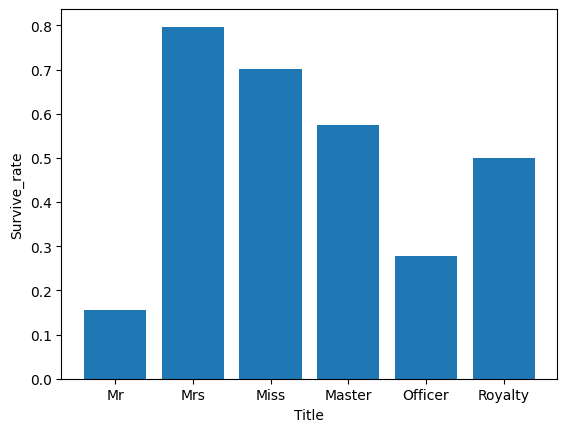

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Sex_num', 'age_cul', 'price_cul',
       'Cabin_num', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'FamilySizeDiscrete', 'FamilySizeD_num', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')

In [206]:
survive_mr = train_data[train_data.Title == 'Mr'][train_data[train_data.Title == 'Mr'].Survived == 1].shape[0] / train_data[train_data.Title == 'Mr'].shape[0]
survive_mrs = train_data[train_data.Title == 'Mrs'][train_data[train_data.Title == 'Mrs'].Survived == 1].shape[0] / train_data[train_data.Title == 'Mrs'].shape[0]
survive_miss = train_data[train_data.Title == 'Miss'][train_data[train_data.Title == 'Miss'].Survived == 1].shape[0] / train_data[train_data.Title == 'Miss'].shape[0]
survive_master = train_data[train_data.Title == 'Master'][train_data[train_data.Title == 'Master'].Survived == 1].shape[0] / train_data[train_data.Title == 'Master'].shape[0]
survive_officer = train_data[train_data.Title == 'Officer'][train_data[train_data.Title == 'Officer'].Survived == 1].shape[0] / train_data[train_data.Title == 'Officer'].shape[0]
survive_royalty = train_data[train_data.Title == 'Royalty'][train_data[train_data.Title == 'Royalty'].Survived == 1].shape[0] / train_data[train_data.Title == 'Royalty'].shape[0]
plt.bar(['Mr','Mrs','Miss','Master','Officer','Royalty'],[survive_mr,survive_mrs,survive_miss,survive_master,survive_officer,survive_royalty])
plt.xlabel('Title')
plt.ylabel('Survive_rate')
plt.show()
# 转化成one-hot编码
train_data = pd.get_dummies(train_data, columns=['Title'])
test_data = pd.get_dummies(test_data, columns=['Title'])
# 为test补充Title_Royalty列
test_data['Title_Royalty'] = 0
train_data.columns

### step2 选择特征
* 'Pclass',  'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Cabin_num', 
* 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'FamilySizeD_num'
* 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty'

In [207]:
feature_select = train_data.loc[:,['Pclass',  'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Cabin_num', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'FamilySizeD_num', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty']]
feature_select_test = test_data.loc[:,['Pclass',  'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Cabin_num', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'FamilySizeD_num', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty']]
#feature_select.drop(0)
#feature_select
matrix_raw = []
for row in feature_select.iterrows():
    matrix_raw.append(row[1].values)
    #print(row[1].values)
matrix = np.asarray(matrix_raw)
matrix

array([[3, 22.0, 1, ..., False, False, False],
       [1, 38.0, 1, ..., True, False, False],
       [3, 26.0, 0, ..., False, False, False],
       ...,
       [3, 28.0, 1, ..., False, False, False],
       [1, 26.0, 0, ..., False, False, False],
       [3, 32.0, 0, ..., False, False, False]], dtype=object)

In [208]:
# 方差法判断特征是否发散
selector = VarianceThreshold(threshold=0.5)
selected_matrix = selector.fit_transform(matrix)
selected_idx = selector.get_support(indices=True)
print(f'被保留的特征索引：{selected_idx}')

被保留的特征索引：[ 0  1  2  3  4  6 10]


In [209]:
# 包装法判断与目标是否相关
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
selector = RFE(estimator=LogisticRegression(), n_features_to_select=10)
selected_matrix = selector.fit_transform(matrix, train_data['Survived'])
selected_idx = selector.get_support(indices=True)
print(f'被保留的特征索引：{selected_idx}')

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:

被保留的特征索引：[ 0  2  5  7 12 13 14 15 16 17]


In [210]:
# 嵌入法判断与目标是否相关
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
selector = SelectFromModel(estimator=GradientBoostingClassifier())
selected_matrix = selector.fit_transform(matrix, train_data['Survived'])
selected_idx = selector.get_support(indices=True)
print(f'被保留的特征索引：{selected_idx}')

被保留的特征索引：[ 0  1  4 14]


### step3 特征降维
* 观察到称谓和性别年龄、家庭大小和家庭人数兄弟姐妹数量等特征之间存在一定程度的雷同，因此选择LDA进行特征降维

In [211]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matrix)
pca_matrix = pca.transform(matrix)
pca_matrix_idx = pca.components_.argsort()[::-1][:pca.n_components]
print(f'被保留的特征索引：{pca_matrix_idx}')
print(pca_matrix)

被保留的特征索引：[[10  4  2  0 11  3 13 12  8  7 17  9 16  5 15 14  6  1]
 [ 0 14  5  9  8 17 16 12 15 13  7  3  2 11 10  6  1  4]]
[[-25.15557504  -6.70927828]
 [ 39.33780521   7.61120879]
 [-24.38181145  -2.68524422]
 ...
 [ -8.77555689  -1.27142254]
 [ -2.26828535  -3.17451153]
 [-24.39749671   3.32776687]]


In [212]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
selector = LDA(n_components=1)
selected_matrix = selector.fit_transform(feature_select, train_data['Survived'])
print(feature_select.shape[1])
print(selected_matrix.shape[1])

18
1


## Ⅳ 模型构建及训练

In [213]:
y = train_data["Survived"]

#features = ["Pclass","Sex","SibSp","Parch"]
X = pd.get_dummies(feature_select)
X_test = pd.get_dummies(feature_select_test)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
print(X_test)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('data/my_submission.csv', index=False)

     Pclass   Age  SibSp  Parch      Fare  Sex_num  Cabin_num  Embarked_C  \
0         3  34.5      0      0    7.8292        1          0       False   
1         3  47.0      1      0    7.0000        0          0       False   
2         2  62.0      0      0    9.6875        1          0       False   
3         3  27.0      0      0    8.6625        1          0       False   
4         3  22.0      1      1   12.2875        0          0       False   
..      ...   ...    ...    ...       ...      ...        ...         ...   
413       3  27.0      0      0    8.0500        1          0       False   
414       1  39.0      0      0  108.9000        0          3        True   
415       3  38.5      0      0    7.2500        1          0       False   
416       3  27.0      0      0    8.0500        1          0       False   
417       3  27.0      1      1   22.3583        1          0        True   

     Embarked_Q  Embarked_S  FamilySize  FamilySizeD_num  Title_Master  \
0

In [214]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature_select, train_data['Survived'])
print(train_x, train_y, '\n')
print(test_x, test_y)

     Pclass   Age  SibSp  Parch     Fare  Sex_num  Cabin_num  Embarked_C  \
15        2  55.0      0      0  16.0000        0          0       False   
50        3   7.0      4      1  39.6875        1          0       False   
804       3  27.0      0      0   6.9750        1          0       False   
869       3   4.0      1      1  11.1333        1          0       False   
93        3  26.0      1      2  20.5750        1          0       False   
..      ...   ...    ...    ...      ...      ...        ...         ...   
193       2   3.0      1      1  26.0000        1          6       False   
239       2  33.0      0      0  12.2750        1          0       False   
219       2  30.0      0      0  10.5000        1          0       False   
431       3  28.0      1      0  16.1000        0          0       False   
83        1  28.0      0      0  47.1000        1          0       False   

     Embarked_Q  Embarked_S  FamilySize  FamilySizeD_num  Title_Master  \
15        Fal

In [215]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
log_reg = linear_model.LogisticRegression()

lin_reg.fit(train_x, train_y)
print(f'intercept: {lin_reg.intercept_: .2f}')
print('coef: ',lin_reg.coef_)

test_predict = lin_reg.predict(test_x)
lin_reg.score(test_x, test_y)


intercept:  1.53
coef:  [-1.32532946e-01 -3.49875972e-03 -2.02941190e-02 -4.10830324e-03
  1.64636558e-04 -5.93233098e-01  2.01520069e-02  3.56347772e-02
  1.44652248e-03 -3.70812997e-02 -2.44024223e-02 -6.45833113e-02
  3.21890326e-01 -2.79533199e-01 -2.16442582e-01 -1.34510063e-01
 -1.88276822e-01  4.96872340e-01]


0.39167277597992023

In [216]:
log_reg.fit(train_x, train_y)
#print('intercept:', log_reg.intercept_)
#print('coef: ',log_reg.coef_)

test_predict = log_reg.predict(test_x)
log_reg = log_reg.score(test_x, test_y)

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

decision_tree_classifier = DecisionTreeClassifier(criterion="entropy")  #使用信息熵增益
scv = LinearSVC()

dcTree = decision_tree_classifier.fit(train_x, train_y)
test_predict = decision_tree_classifier.predict(test_x)
decision_tree_classifier.score(test_x, test_y)

0.7623318385650224

In [218]:
Lscv = scv.fit(train_x, train_y)
test_predict = scv.predict(test_x)

scv.score(test_x, test_y)

d:\python\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\python\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8026905829596412